Repeated the notebook, to do EDA on other features to see if there was anything worth exploring regarding our goals

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeCV, Lasso, Ridge

In [86]:
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/Data/online_gaming_behavior_dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("gaming.csv")

In [8]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [89]:
df.shape

(40034, 13)

In [90]:
df.isna().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [ ]:
df.GameGenre.unique()

array(['Strategy', 'Sports', 'Action', 'RPG', 'Simulation'], dtype=object)

In [10]:
df.Gender = np.where(df["Gender"] == "Male", 1, 0)

In [12]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,0,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,0,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,1,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,1,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [14]:
df.GameDifficulty.unique()

array(['Medium', 'Easy', 'Hard'], dtype=object)

In [16]:
df["GameDifficulty"] = df["GameDifficulty"].map({"Easy": 1, "Medium": 2, "Hard": 3})

In [18]:
df.EngagementLevel.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [20]:
df["EngagementLevel"] = df["EngagementLevel"].map({"Low": 1, "Medium": 2, "High": 3})

In [22]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,Other,Strategy,16.271119,0,2,6,108,79,25,2
1,9001,29,0,USA,Strategy,5.525961,0,2,5,144,11,10,2
2,9002,22,0,USA,Sports,8.223755,0,1,16,142,35,41,3
3,9003,35,1,USA,Action,5.265351,1,1,9,85,57,47,2
4,9004,33,1,Europe,Action,15.531945,0,2,2,131,95,37,2


In [ ]:
df.Location.unique()

array(['Other', 'USA', 'Europe', 'Asia'], dtype=object)

<Axes: xlabel='Age', ylabel='PlayTimeHours'>

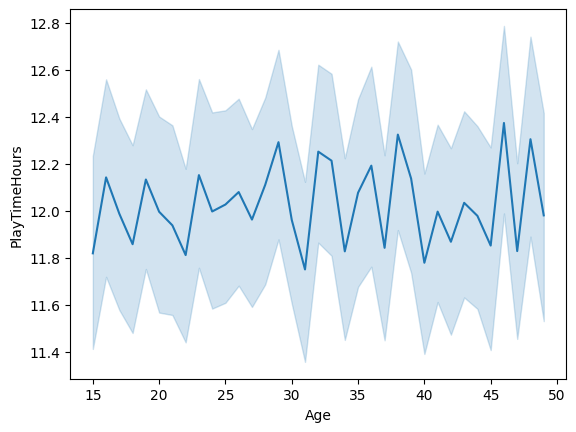

In [ ]:
sns.lineplot(df, x= "Age", y= "PlayTimeHours")

In [ ]:
df.Gender

0        1
1        0
2        0
3        1
4        1
        ..
40029    1
40030    0
40031    0
40032    1
40033    1
Name: Gender, Length: 40034, dtype: int64

In [94]:
df["Age"].groupby(df["Gender"]).mean()

Gender
Female    32.017978
Male      31.975458
Name: Age, dtype: float64

In [95]:
df["PlayTimeHours"].groupby(df["Gender"]).mean()

Gender
Female    11.969376
Male      12.061260
Name: PlayTimeHours, dtype: float64

<Axes: xlabel='Age', ylabel='PlayTimeHours'>

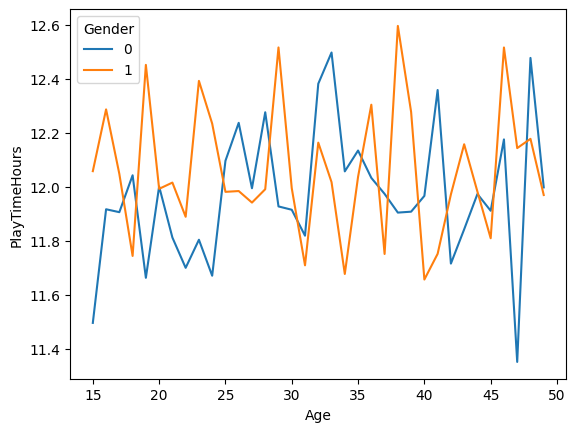

In [ ]:
sns.lineplot(x= df.Age, y= df.PlayTimeHours, hue= df.Gender, err_style= None)

<Axes: xlabel='Age', ylabel='AvgSessionDurationMinutes'>

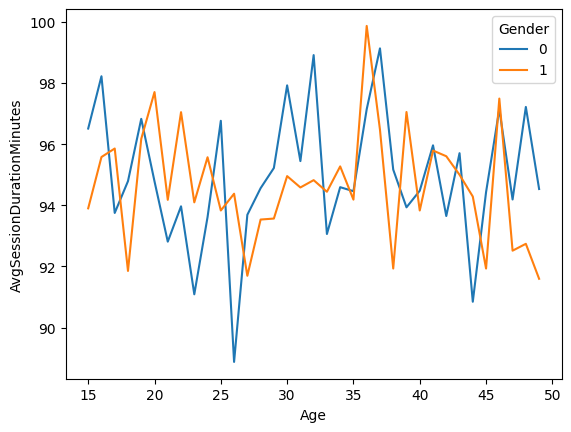

In [ ]:
sns.lineplot(x= df.Age, y= df.AvgSessionDurationMinutes, hue= df.Gender, err_style= None)

<Axes: xlabel='Age', ylabel='PlayerLevel'>

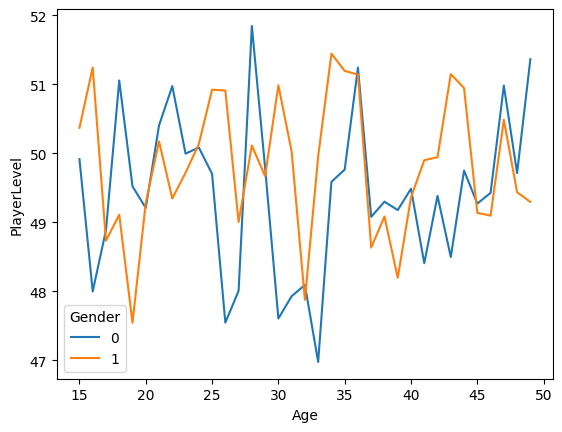

In [ ]:
sns.lineplot(x= df.Age, y= df.PlayerLevel, hue= df.Gender, err_style= None)

<Axes: xlabel='Age', ylabel='AchievementsUnlocked'>

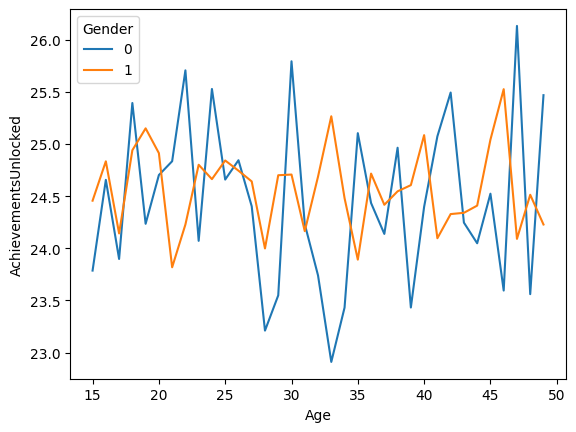

In [ ]:
sns.lineplot(x= df.Age, y= df.AchievementsUnlocked, hue= df.Gender, err_style= None)

<Axes: xlabel='Age', ylabel='SessionsPerWeek'>

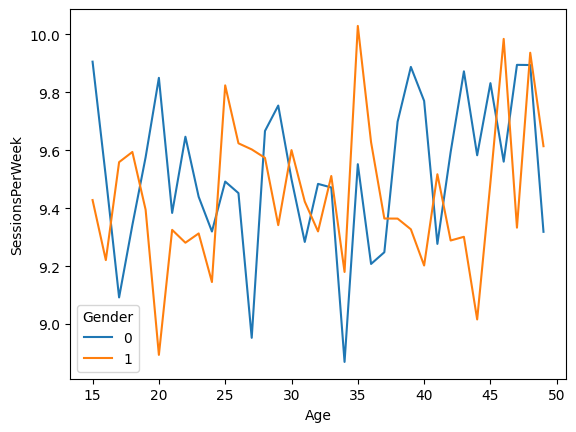

In [ ]:
sns.lineplot(x= df.Age, y= df.SessionsPerWeek, hue= df.Gender, err_style= None)

<Axes: xlabel='Age', ylabel='GameDifficulty'>

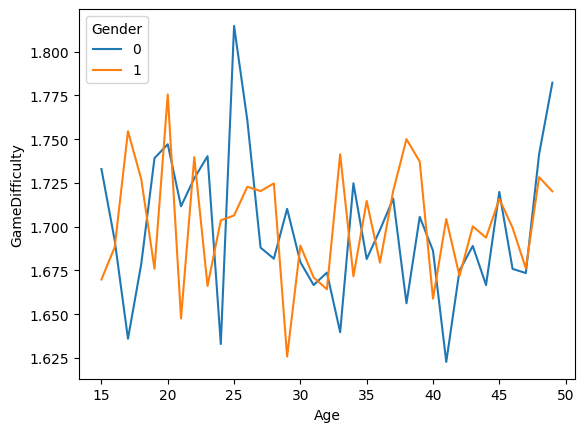

In [ ]:
sns.lineplot(y= df.GameDifficulty, x= df.Age, hue= df.Gender, err_style= None)

<Axes: xlabel='Age', ylabel='PlayTimeHours'>

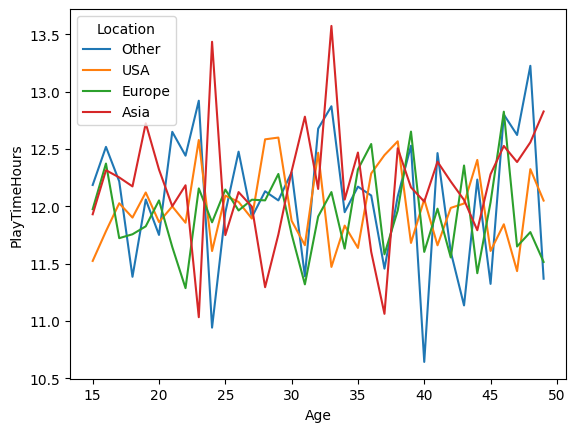

In [ ]:
sns.lineplot(x= df.Age, y= df.PlayTimeHours, hue= df.Location, err_style= None)

<Axes: xlabel='Age', ylabel='AvgSessionDurationMinutes'>

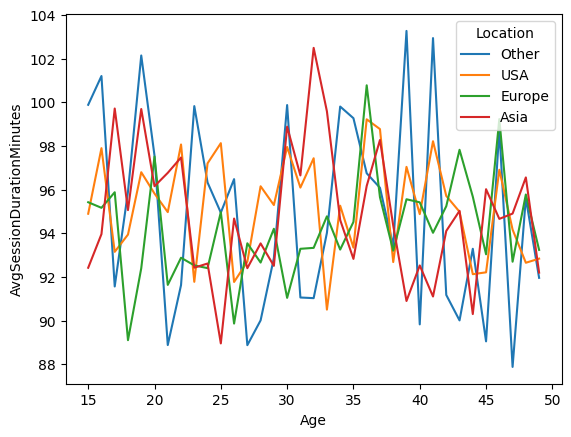

In [ ]:
sns.lineplot(x= df.Age, y= df.AvgSessionDurationMinutes, hue= df.Location, err_style= None)

<Axes: xlabel='Age', ylabel='GameDifficulty'>

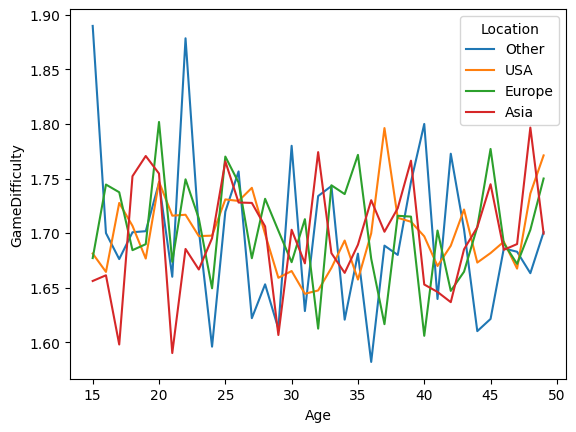

In [ ]:
sns.lineplot(x= df.Age, y= df.GameDifficulty, hue= df.Location, err_style= None)

<Axes: xlabel='Age', ylabel='PlayerLevel'>

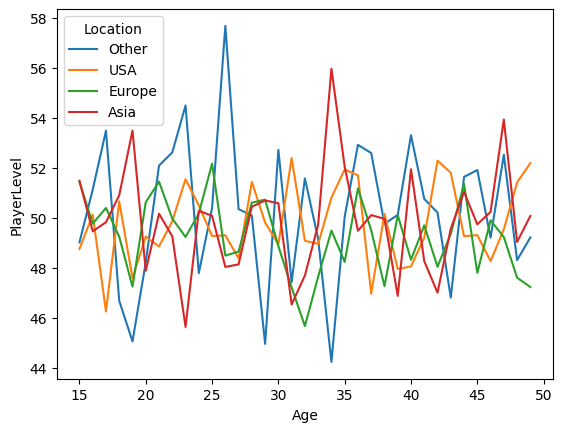

In [ ]:
sns.lineplot(x= df.Age, y= df.PlayerLevel, hue= df.Location, err_style= None)

In [ ]:
df.Location.unique()

array(['Other', 'USA', 'Europe', 'Asia'], dtype=object)

In [ ]:
df.GameGenre.unique()

array(['Strategy', 'Sports', 'Action', 'RPG', 'Simulation'], dtype=object)

In [24]:
df["Location"] = df["Location"].map({"Other": 1, "USA": 2, "Europe": 3, "Asia": 4})

In [26]:
df["GameGenre"] = df["GameGenre"].map({"Strategy": 1, "Sports": 2, "Action": 3, "RPG": 4, "Simulation": 5})

In [28]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,1,1,16.271119,0,2,6,108,79,25,2
1,9001,29,0,2,1,5.525961,0,2,5,144,11,10,2
2,9002,22,0,2,2,8.223755,0,1,16,142,35,41,3
3,9003,35,1,2,3,5.265351,1,1,9,85,57,47,2
4,9004,33,1,3,3,15.531945,0,2,2,131,95,37,2


In [ ]:
df_corr = df.corr()

<Axes: >

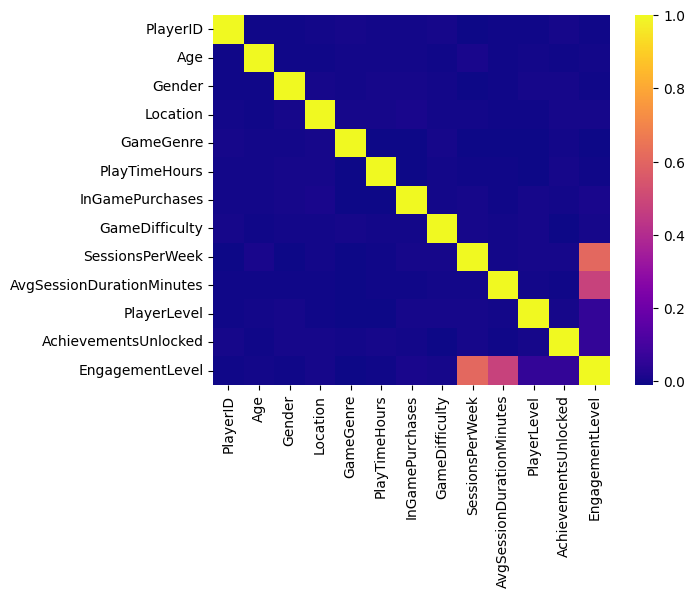

In [ ]:
sns.heatmap(df_corr, cmap= "plasma")

In [ ]:
df.GameGenre.value_counts(normalize= True)

GameGenre
2    0.201029
3    0.200804
1    0.200130
5    0.199406
4    0.198631
Name: proportion, dtype: float64

In [ ]:
df.Location.value_counts(normalize= True)

Location
2    0.399660
3    0.299845
4    0.202203
1    0.098291
Name: proportion, dtype: float64

In [ ]:
df.Gender.value_counts(normalize= True)

Gender
1    0.598466
0    0.401534
Name: proportion, dtype: float64

0.598 being the baseline score for gender classification, for later.

In [ ]:
df.Age.value_counts(normalize= True)

Age
31    0.030674
37    0.030449
27    0.030399
40    0.030024
42    0.029650
29    0.029650
43    0.029475
18    0.029150
44    0.029125
32    0.029050
36    0.028825
24    0.028801
35    0.028751
22    0.028726
30    0.028726
17    0.028701
38    0.028476
19    0.028451
16    0.028426
23    0.028226
39    0.028176
21    0.028176
33    0.028051
46    0.028001
20    0.027801
41    0.027751
25    0.027676
28    0.027676
45    0.027676
26    0.027651
49    0.027627
34    0.027552
47    0.027527
15    0.027502
48    0.027402
Name: proportion, dtype: float64

In [ ]:
df.PlayerLevel.value_counts(normalize= True)

PlayerLevel
14    0.011215
16    0.011091
19    0.011016
48    0.010991
36    0.010991
        ...   
65    0.009317
62    0.009242
30    0.009142
84    0.008917
41    0.008867
Name: proportion, Length: 99, dtype: float64

<Axes: xlabel='Age'>

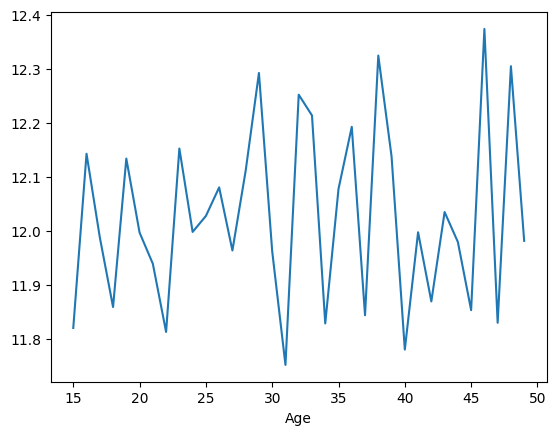

In [ ]:
df["PlayTimeHours"].groupby(df.Age).mean().plot()

<Axes: xlabel='Age'>

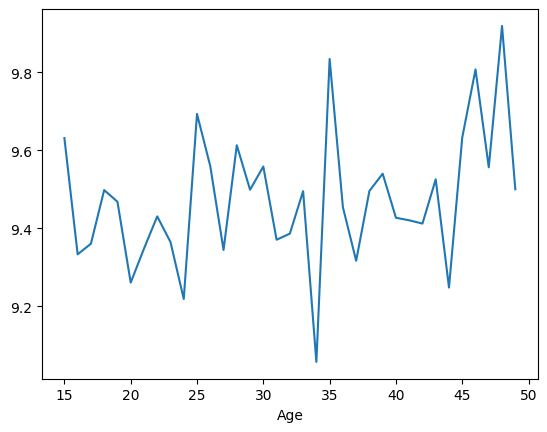

In [ ]:
df["SessionsPerWeek"].groupby(df.Age).mean().plot()

<Axes: xlabel='Age'>

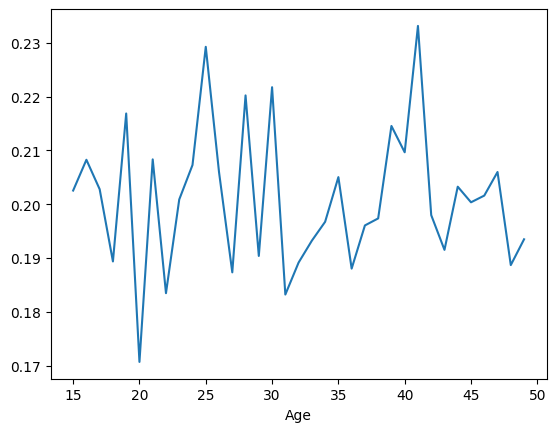

In [ ]:
df["InGamePurchases"].groupby(df.Age).mean().plot()

<Axes: xlabel='Age'>

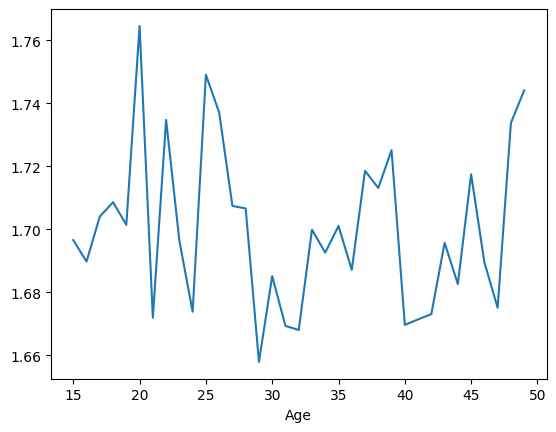

In [ ]:
df["GameDifficulty"].groupby(df.Age).mean().plot()

<Axes: xlabel='Age'>

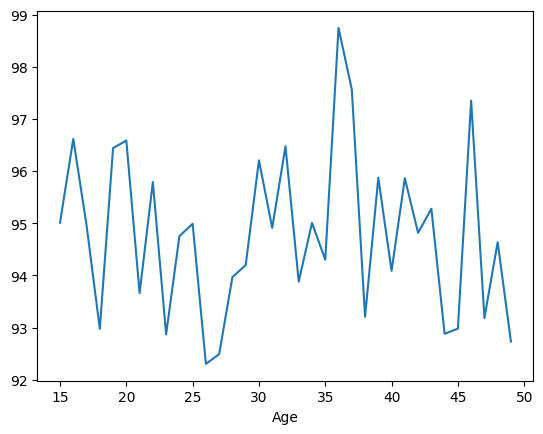

In [ ]:
df["AvgSessionDurationMinutes"].groupby(df.Age).mean().plot()

After EDA, there is genuinely no correlation between the values, so attempting NN, to see if it picks up on anything

In [ ]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,1,1,16.271119,0,2,6,108,79,25,2
1,9001,29,0,2,1,5.525961,0,2,5,144,11,10,2
2,9002,22,0,2,2,8.223755,0,1,16,142,35,41,3
3,9003,35,1,2,3,5.265351,1,1,9,85,57,47,2
4,9004,33,1,3,3,15.531945,0,2,2,131,95,37,2


In [98]:
X = df.drop(columns= ["Age", "PlayerID"])
y = df["Age"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 343)

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
model = Sequential([
    Dense(512, activation= "relu", input_shape= (X_train_sc.shape[1],)),
    Dense(256, activation= "relu"),
    Dropout(0.5),
    Dense(128, activation= "relu"),
    Dropout(0.5),
    Dense(64, activation= "relu", kernel_regularizer= l1(0.01)),
    Dense(32, activation= "relu", kernel_regularizer= l1(0.1)),
    Dense(1, kernel_regularizer= l1(0.01))
])

model.compile(loss= "mse", optimizer= "adam", metrics= ["mae"])

In [ ]:
hist = model.fit(
    X_train_sc, y_train,
    validation_data= (X_test_sc, y_test),
    batch_size= 32,
    epochs= 40
)

Epoch 1/40
939/939 [==============================] - 11s 5ms/step - loss: 165.2942 - mae: 9.9990 - val_loss: 159.4296 - val_mae: 10.0872
Epoch 2/40
939/939 [==============================] - 5s 5ms/step - loss: 129.3081 - mae: 9.2435 - val_loss: 146.2096 - val_mae: 9.7846
Epoch 3/40
939/939 [==============================] - 6s 6ms/step - loss: 126.6939 - mae: 9.2130 - val_loss: 140.6967 - val_mae: 9.6400
Epoch 4/40
939/939 [==============================] - 6s 7ms/step - loss: 123.1060 - mae: 9.1434 - val_loss: 255.8968 - val_mae: 12.9620
Epoch 5/40
939/939 [==============================] - 5s 6ms/step - loss: 119.2698 - mae: 9.0503 - val_loss: 228.2653 - val_mae: 12.1927
Epoch 6/40
939/939 [==============================] - 5s 5ms/step - loss: 116.4495 - mae: 8.9670 - val_loss: 198.0178 - val_mae: 11.3364
Epoch 7/40
939/939 [==============================] - 5s 5ms/step - loss: 114.9584 - mae: 8.9239 - val_loss: 220.2086 - val_mae: 11.9800
Epoch 8/40
939/939 [======================

In [ ]:
y.shape

(40034,)

In [ ]:
y_hat = np.mean(y)

In [ ]:
np.sum((y_test - y_hat)**2) / len(y_test)

101.47560884409847

This being the MSE for age, baseline score.

In [ ]:
np.sum(y_test - y_hat) / len(y_test)

0.04633367312676727

This being the MAE for Age

In [ ]:
model.evaluate(X_test_sc, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 103.1089 - mae: 8.7471


[103.1089096069336, 8.747099876403809]

In [ ]:
model2 = Sequential([
    Dense(512, activation= "relu", input_shape= (X_train_sc.shape[1],)),
    Dense(256, activation= "relu"),
    Dropout(0.5),
    Dense(128, activation= "relu"),
    Dropout(0.5),
    Dense(64, activation= "relu", kernel_regularizer= l1(0.1)),
    Dense(32, activation= "relu", kernel_regularizer= l1(0.01)),
    Dense(1, kernel_regularizer= l1(0.001))
])

es = EarlyStopping(patience= 7)

model2.compile(loss= "mse", optimizer= "adam", metrics= ["mae"])

hist2 = model2.fit(
    X_train_sc, y_train,
    validation_data= (X_test_sc, y_test),
    batch_size= 32,
    epochs= 40,
    callbacks= [es]
)

Epoch 1/40
939/939 [==============================] - 8s 7ms/step - loss: 177.8849 - mae: 9.9941 - val_loss: 154.6545 - val_mae: 9.7105
Epoch 2/40
939/939 [==============================] - 5s 5ms/step - loss: 136.8676 - mae: 9.2692 - val_loss: 190.2271 - val_mae: 10.8726
Epoch 3/40
939/939 [==============================] - 5s 5ms/step - loss: 127.3386 - mae: 9.0871 - val_loss: 290.7006 - val_mae: 13.8407
Epoch 4/40
939/939 [==============================] - 6s 6ms/step - loss: 122.3361 - mae: 9.0167 - val_loss: 284.7603 - val_mae: 13.7396
Epoch 5/40
939/939 [==============================] - 4s 5ms/step - loss: 117.7035 - mae: 8.9446 - val_loss: 251.2233 - val_mae: 12.8316
Epoch 6/40
939/939 [==============================] - 5s 6ms/step - loss: 115.4693 - mae: 8.9361 - val_loss: 272.7852 - val_mae: 13.4741
Epoch 7/40
939/939 [==============================] - 5s 6ms/step - loss: 112.5692 - mae: 8.8729 - val_loss: 238.9549 - val_mae: 12.5436
Epoch 8/40
939/939 [======================

In [ ]:
model2.evaluate(X_test_sc, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 102.3751 - mae: 8.7262


[102.37511444091797, 8.726171493530273]

In [30]:
X_gender = df.drop(columns= ["Gender", "PlayerID"])
y_gender = df["Gender"]

X_train, X_test, y_train, y_test = train_test_split(X_gender, y_gender, random_state= 343)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
gender_model = Sequential([
    Dense(64, activation= "relu", input_shape= (X_train_sc.shape[1],)),
    Dropout(0.5),
    Dense(64, activation= "relu"),
    Dropout(0.5),
    Dense(32, activation= "relu", kernel_regularizer= l1(0.001)),
    Dense(1, activation= "sigmoid")
])

es = EarlyStopping(patience= 7)

gender_model.compile(loss= "bce", optimizer= "adam", metrics= ["acc"])

gender_hist = gender_model.fit(
    X_train_sc, y_train,
    validation_data= (X_test_sc, y_test),
    batch_size= 32,
    epochs= 40,
    callbacks= [es]
)

Epoch 1/40
939/939 [==============================] - 6s 4ms/step - loss: 0.7962 - acc: 0.5918 - val_loss: 0.7151 - val_acc: 0.5947
Epoch 2/40
939/939 [==============================] - 6s 6ms/step - loss: 0.6928 - acc: 0.5997 - val_loss: 0.6821 - val_acc: 0.5947
Epoch 3/40
939/939 [==============================] - 4s 4ms/step - loss: 0.6773 - acc: 0.5997 - val_loss: 0.6776 - val_acc: 0.5947
Epoch 4/40
939/939 [==============================] - 4s 5ms/step - loss: 0.6753 - acc: 0.5997 - val_loss: 0.6768 - val_acc: 0.5947
Epoch 5/40
939/939 [==============================] - 6s 6ms/step - loss: 0.6750 - acc: 0.5997 - val_loss: 0.6774 - val_acc: 0.5947
Epoch 6/40
939/939 [==============================] - 4s 5ms/step - loss: 0.6748 - acc: 0.5997 - val_loss: 0.6768 - val_acc: 0.5947
Epoch 7/40
939/939 [==============================] - 4s 4ms/step - loss: 0.6747 - acc: 0.5997 - val_loss: 0.6767 - val_acc: 0.5947
Epoch 8/40
939/939 [==============================] - 5s 6ms/step - loss: 0.

KeyboardInterrupt: 

In [ ]:
gender_model2 = Sequential([
    Dense(512, activation= "relu", input_shape= (X_train_sc.shape[1],)),
    Dense(256, activation= "relu"),
    Dropout(0.5),
    Dense(128, activation= "relu"),
    Dropout(0.5),
    Dense(64, activation= "relu", kernel_regularizer= l1(0.001)),
    Dense(32, activation= "relu", kernel_regularizer= l1(0.01)),
    Dense(1, activation= "sigmoid")
])

es = EarlyStopping(patience= 7)

gender_model2.compile(loss= "bce", optimizer= "adam", metrics= ["acc"])

gender_hist2 = gender_model2.fit(
    X_train_sc, y_train,
    validation_data= (X_test_sc, y_test),
    batch_size= 32,
    epochs= 40,
    callbacks= [es]
)

Epoch 1/40
939/939 [==============================] - 7s 5ms/step - loss: 0.9882 - acc: 0.5989 - val_loss: 0.6786 - val_acc: 0.5947
Epoch 2/40
939/939 [==============================] - 7s 7ms/step - loss: 0.6764 - acc: 0.5997 - val_loss: 0.6784 - val_acc: 0.5947
Epoch 3/40
939/939 [==============================] - 5s 5ms/step - loss: 0.6765 - acc: 0.5997 - val_loss: 0.6783 - val_acc: 0.5947
Epoch 4/40
939/939 [==============================] - 5s 5ms/step - loss: 0.6765 - acc: 0.5997 - val_loss: 0.6785 - val_acc: 0.5947
Epoch 5/40
939/939 [==============================] - 6s 6ms/step - loss: 0.6765 - acc: 0.5997 - val_loss: 0.6785 - val_acc: 0.5947
Epoch 6/40
939/939 [==============================] - 5s 5ms/step - loss: 0.6765 - acc: 0.5997 - val_loss: 0.6785 - val_acc: 0.5947
Epoch 7/40
939/939 [==============================] - 6s 6ms/step - loss: 0.6765 - acc: 0.5997 - val_loss: 0.6785 - val_acc: 0.5947
Epoch 8/40
939/939 [==============================] - 5s 6ms/step - loss: 0.

KeyboardInterrupt: 

I cancelled the neural nets early, as they both stagnated from the beginning.

I attempted neural nets, but yielded no good results, they either stagnated from the get go, as shown with the gender models, or they performed than the baseline. This shows that either it is hard to predict these targets, or, that neural nets are insufficient for the task.

In [ ]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,1,1,1,16.271119,0,2,6,108,79,25,2
1,9001,29,0,2,1,5.525961,0,2,5,144,11,10,2
2,9002,22,0,2,2,8.223755,0,1,16,142,35,41,3
3,9003,35,1,2,3,5.265351,1,1,9,85,57,47,2
4,9004,33,1,3,3,15.531945,0,2,2,131,95,37,2


<Axes: xlabel='Age', ylabel='PlayTimeHours'>

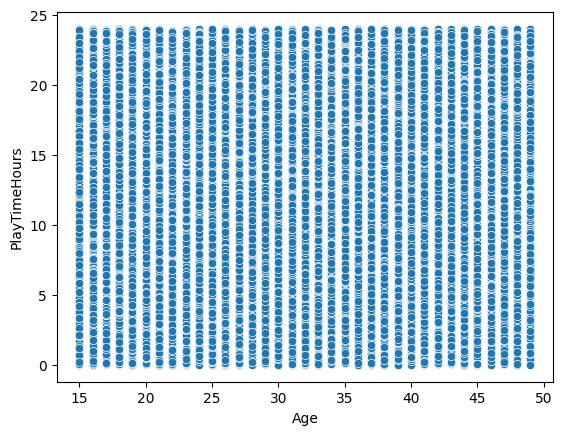

In [ ]:
sns.scatterplot(df, x= "Age", y= "PlayTimeHours")

Whilst not all the data, shows that clustering may be pointless. So best approach it via tree modelling

In [ ]:
df.describe()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,0.598466,2.605960,2.996153,12.024365,0.200854,1.700080,9.471774,94.792252,49.655568,24.526477,2.000300
std,11556.964675,10.043227,0.490215,0.916397,1.413449,6.914638,0.400644,0.781053,5.763667,49.011375,28.588379,14.430726,0.718383
min,9000.000000,15.000000,0.000000,1.000000,1.000000,0.000115,0.000000,1.000000,0.000000,10.000000,1.000000,0.000000,1.000000
25%,19008.250000,23.000000,0.000000,2.000000,2.000000,6.067501,0.000000,1.000000,4.000000,52.000000,25.000000,12.000000,1.000000
50%,29016.500000,32.000000,1.000000,3.000000,3.000000,12.008002,0.000000,2.000000,9.000000,95.000000,49.000000,25.000000,2.000000
75%,39024.750000,41.000000,1.000000,3.000000,4.000000,17.963831,0.000000,2.000000,14.000000,137.000000,74.000000,37.000000,3.000000
max,49033.000000,49.000000,1.000000,4.000000,5.000000,23.999592,1.000000,3.000000,19.000000,179.000000,99.000000,49.000000,3.000000


We can see that the data has no correlation or workable model so far, so I opted for tree models, as it seems classification might be the way to go here.

In [104]:
X_age = df.drop(columns= ["PlayerID", "Age"])
y_age = df["Age"]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_gender, y_gender, random_state= 343)

In [106]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.505145369167749)

In [108]:
bagtree = DecisionTreeClassifier()
bag = BaggingClassifier(bagtree, n_estimators= 500, random_state= 343)

In [109]:
%%time
bag.fit(X_train, y_train)

CPU times: user 1min 54s, sys: 393 ms, total: 1min 55s
Wall time: 1min 59s


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=343)

In [110]:
bag.score(X_train, y_train)

1.0

In [111]:
bag.score(X_test, y_test)

0.5757817963832551

In [112]:
rf = RandomForestClassifier(n_estimators= 500, oob_score= True)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, oob_score=True)

In [113]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 0.579978019782196)

In [114]:
et = ExtraTreesClassifier(n_estimators= 500)
et.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=500)

In [115]:
et.score(X_train, y_train), et.score(X_test, y_test)

(1.0, 0.573284044360076)

In [122]:
pipe = Pipeline([
    ("sc", StandardScaler()),
    ("pc", PCA()),
    ("lr", LogisticRegression(penalty= None))
    ])

pgrid = {"pc__n_components": np.arange(1, 12)}

gs = GridSearchCV(pipe, pgrid, cv=5)

In [123]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()), ('pc', PCA()),
                                       ('lr',
                                        LogisticRegression(penalty=None))]),
             param_grid={'pc__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])})

In [124]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.5997335553705245, 0.5946648016784893)

In [125]:
gs.best_params_

{'pc__n_components': 1}

In [134]:
lasso = Lasso()
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [135]:
lasso.fit(X_train_sc, y_train)

Lasso()

In [136]:
lasso.score(X_train_sc, y_train), lasso.score(X_test_sc, y_test)

(0.0, -0.00010658984337275079)

In [141]:
ridge_alphas = np.logspace(0, 10, 100)

In [143]:
ridge_cv = RidgeCV(alphas= ridge_alphas, cv= 5)

In [144]:
ridge_cv.fit(X_train_sc, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.26185688e+00, 1.59228279e+00, 2.00923300e+00,
       2.53536449e+00, 3.19926714e+00, 4.03701726e+00, 5.09413801e+00,
       6.42807312e+00, 8.11130831e+00, 1.02353102e+01, 1.29154967e+01,
       1.62975083e+01, 2.05651231e+01, 2.59502421e+01, 3.27454916e+01,
       4.13201240e+01, 5.21400829e+01, 6.57933225e+01, 8.30217568e+01,
       1.04761575e+02, 1.32194115e+0...
       4.75081016e+07, 5.99484250e+07, 7.56463328e+07, 9.54548457e+07,
       1.20450354e+08, 1.51991108e+08, 1.91791026e+08, 2.42012826e+08,
       3.05385551e+08, 3.85352859e+08, 4.86260158e+08, 6.13590727e+08,
       7.74263683e+08, 9.77009957e+08, 1.23284674e+09, 1.55567614e+09,
       1.96304065e+09, 2.47707636e+09, 3.12571585e+09, 3.94420606e+09,
       4.97702356e+09, 6.28029144e+09, 7.92482898e+09, 1.00000000e+10]),
        cv=5)

In [145]:
ridge_cv.best_score_

-9.91584471131901e-05

Tried regularising/feature selecting models to see if they worked better, but on the whole no.

It seems overall tree classifying models work the best all round, so we'll try to improve on that

In [88]:
tree_ada = DecisionTreeClassifier(max_depth= 1)
ada = AdaBoostClassifier(tree_ada, n_estimators= 500, algorithm= "SAMME.R")

In [90]:
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=500)

In [91]:
ada.score(X_train, y_train), ada.score(X_test, y_test)

(0.6017318900915903, 0.593266060545509)

1 performed the best

In [52]:
gb = GradientBoostingClassifier(n_estimators= 500, max_depth= 2)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=500)

In [53]:
gb.score(X_train, y_train), gb.score(X_test, y_test)

(0.6062947543713572, 0.5913677690078929)

In [74]:
params = {"max_depth": [1, 2, 3, 4, 5, None]}

In [60]:
gb = GradientBoostingClassifier(n_estimators= 500)
gscb = GridSearchCV(gb, params, cv= 5, n_jobs= 7)

In [62]:
gscb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(n_estimators=500),
             n_jobs=7, param_grid={'max_depth': [1, 2, 3, 4, 5, None]})

In [63]:
gscb.best_params_

{'max_depth': 1}

In [64]:
gscb.score(X_train, y_train), gscb.score(X_test, y_test)

(0.600233139050791, 0.5944649815166351)

As you can see, when GameGenre classification failed, I tried Gender and Age, regarding identifying classes, but in all these models, none could beat the baseline assumptions.

Baseline being the split for Gender, and Age I calculated the MSE earlier